<img src='logo_DH.png' align='center' width=35%/>

<h1 style="text-align: center;">Desafío 2 - Modelo de Regresión Lineal</h1>

<a id="section_toc"></a> 
## Tabla de Contenidos

[Introducción y objetivos](#section_intro)

[Importación de librerías y confguración de display()](#section_importacion)

[Importación del archivo properati_desafio_2](#section_properati)

[Inspección de la tabla](#section_inspeccion)

[Regresión](#section_regresión)

---
<a id="section_intro"></a> 
## Introducción y objetivos

[volver a TOC](#section_toc)

La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades para venta y alquiler. Debemos asesorar a la inmobiliaria para desarrollar un modelo de regresión que permita predecir el **precio por metro cuadrado** de una propiedad. 

El objetivo final es que el modelo que desarrollen sea utilizado como **tasador automático** a ser aplicados a las próximas propiedades que sean comercializadas por la empresa. Para ello la empresa le provee de un dataset correspondiente al primer semestre de 2017. El nombre del dataset es *properati.csv*.

En el desafío 1 realizamos los primeros pasos de este objetivo:
- Efectuamos una limpieza del dataset provisto. Lidiamos con los datos perdidos en ciertas variables.
- Realizamos un análisis descriptivo de las principales variables.
- Creamos nuevas columnas a partir de las características dadas que puedan tener valor predictivo. En particular, se calcularon la amenities ya que no lo habíamos realizado.

En este desafío tenemos como objetivo realizar un modelo de regresión lineal que permite predecir el precio por metro cuadrado usando las variables que consideremos relevantes:
- Construcción de variables dummies para realizar el modelo si es necesario.
- Normalización.
- Train/test split del modelo.
- Cross validation.
- Regularización.
- Métricas RMSE y R² (ver para set de entrenamiento y de validación).

---
<a id="section_importacion"></a> 
## Importación de librerías y configuración de display()

[volver a TOC](#section_toc)


En esta parte importamos las librerías que usamos y cambiamos la configuración para tener un display/print correctos/útiles

In [2]:
# Importación de librerias:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
# Configuraciones de display:
pd.set_option("display.max_columns", 50)   # Limita la visualización a max 50 columnas. Si se excede genera "...".NO existe display.min_columns
pd.set_option("display.max_rows", 700)     # Limita la visualización a max 20 columnas. Si se excede genera "..."
pd.set_option("display.min_rows", 20)      # Una vez que display.max_rows se excede, la display.min_rows determina cuántas filas se muestran.
#pd.reset_option("^display")               # Este comando resetea todas las opciones por defecto.

---
<a id="section_properati"></a> 
## Importación del archivo properati_desafio_2.csv

[volver a TOC](#section_toc)

In [23]:
# Importación del archivo de Properati:
data = pd.read_csv("properati_desafio_2.csv", sep = ",", low_memory=False) # low_memory=False es para que lea el archivo con la mayor cantidad de memoria dsponible y no infiera "mal" un tipo de dato.

In [24]:
# Muestra de la tabla:
data.sample(5)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities
34663,APARTMENT,MORÓN,BS.AS. G.B.A. ZONA OESTE,62000.0,37.0,37.0,1675.675676,1675.675676,NaN,NaN,NaN,BS.AS. G.B.A. ZONA OESTE,0,0,0,0,0,0,0
41522,HOUSE,REMEDIOS DE ESCALADA,BS.AS. G.B.A. ZONA SUR,90000.0,180.0,180.0,500.000000,500.000000,NaN,NaN,NaN,BS.AS. G.B.A. ZONA SUR,0,0,0,1,1,0,2
44518,HOUSE,ESCOBAR,BS.AS. G.B.A. ZONA NORTE,195000.0,220.0,220.0,886.363636,886.363636,NaN,NaN,NaN,BS.AS. G.B.A. ZONA NORTE,0,1,0,0,0,0,1
24179,HOUSE,CAPITAL FEDERAL,CAPITAL FEDERAL,395000.0,610.0,145.0,647.540984,2724.137931,NaN,NaN,NaN,CAPITAL FEDERAL,1,1,0,0,0,0,2
6084,APARTMENT,MARTINDALE COUNTRY CLUB,BS.AS. G.B.A. ZONA NORTE,600000.0,290.0,290.0,2068.965517,2068.965517,NaN,5.0,NaN,BS.AS. G.B.A. ZONA NORTE,1,1,0,1,0,0,3


---
<a id="section_inspeccion"></a> 
## Inspección de la tabla

[volver a TOC](#section_toc)

Se realiza un análisis básico para recordar las variables importantes para este modelo.

In [25]:
# Dimensiones:
print("Dimensiones de la tabla: ", data.shape)

Dimensiones de la tabla:  (60678, 19)


In [26]:
# Tipo de datos de las columnas:
data.dtypes

property_type             object
place_name                object
state_name                object
price_aprox_usd          float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
price_usd_per_m2         float64
price_per_m2             float64
floor                    float64
rooms                    float64
expenses                 float64
centro_urbano             object
pileta                     int64
parrilla                   int64
quincho                    int64
patio                      int64
cochera                    int64
balcon                     int64
amenities                  int64
dtype: object

Analizando las columnas una a una podemos ver que los tipos de datos son los correctos segun muestra el df.

In [27]:
# Para evitar inconvenientes en el análisis pasamos todos los strings a uppercase():
data = data.applymap(lambda x: x.upper() if type(x) == str else x)
display(data.sample(3))

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities
21762,HOUSE,BENAVIDEZ,BS.AS. G.B.A. ZONA NORTE,187000.00,1000.0,NaN,187.000000,NaN,NaN,4.0,NaN,BS.AS. G.B.A. ZONA NORTE,1,1,1,1,1,0,5
32914,APARTMENT,BAHÍA BLANCA,BUENOS AIRES INTERIOR,60570.37,36.0,36.0,1682.510278,30000.000000,NaN,2.0,NaN,BUENOS AIRES INTERIOR,0,0,0,0,0,0,0
27110,PH,RECOLETA,CAPITAL FEDERAL,108000.00,34.0,34.0,3176.470588,3176.470588,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,0,0,0,0


In [28]:
# Porcentaje de nulos por columnas:
(data.isnull().sum()/data.shape[0]*100).round(2)

property_type             0.00
place_name                0.03
state_name                0.00
price_aprox_usd           0.00
surface_total_in_m2       0.00
surface_covered_in_m2     7.82
price_usd_per_m2          0.00
price_per_m2              7.82
floor                    95.11
rooms                    54.77
expenses                 83.17
centro_urbano             0.00
pileta                    0.00
parrilla                  0.00
quincho                   0.00
patio                     0.00
cochera                   0.00
balcon                    0.00
amenities                 0.00
dtype: float64

---
<a id="section_regresion"></a> 
## Regresión

[volver a TOC](#section_toc)

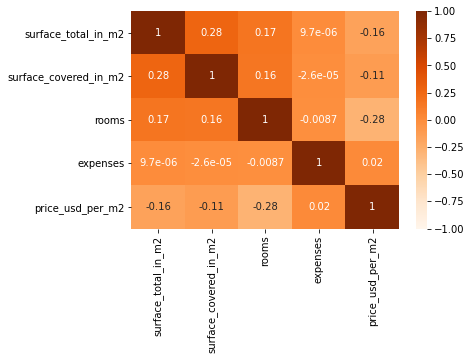

In [71]:
# Graficamos un heatmap con las variables numericas que pueden ser utilizadas en el modelo:
data_numerico_mask = data[['surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'expenses', 'price_usd_per_m2']]

sns.heatmap(data_numerico_mask.corr(), annot=True, vmin=-1, cmap='Oranges');

(0.0, 7923.390014810532)

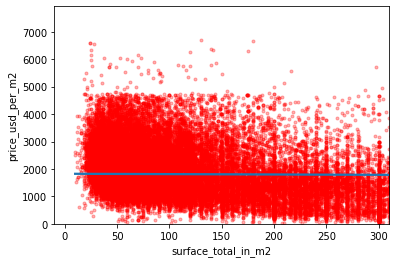

In [30]:
# Graficamos una recta de regresión de la variable surface_total_in_m2:
sns.regplot(data.surface_total_in_m2, data.price_usd_per_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9,'alpha':.3})
plt.xlim(-10,310)
plt.ylim(bottom=0)

(0.0, 7509.694278450957)

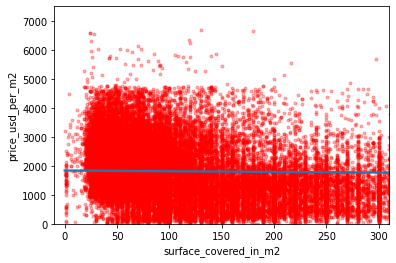

In [31]:
#Graficamos una recta de regresión de la variable surface_covered_in_m2:
sns.regplot(data.surface_covered_in_m2, data.price_usd_per_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9, 'alpha':.3})
plt.xlim(-10,310)
plt.ylim(bottom=0)

(0.0, 6427.900145016259)

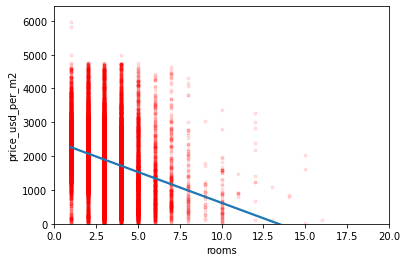

In [32]:
#Graficamos una recta de regresión de la variable rooms_regex_title:
sns.regplot(data.rooms, data.price_usd_per_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9,'alpha':.1})
plt.xlim(0,20)
plt.ylim(bottom=0)

<AxesSubplot:xlabel='property_type', ylabel='price_usd_per_m2'>

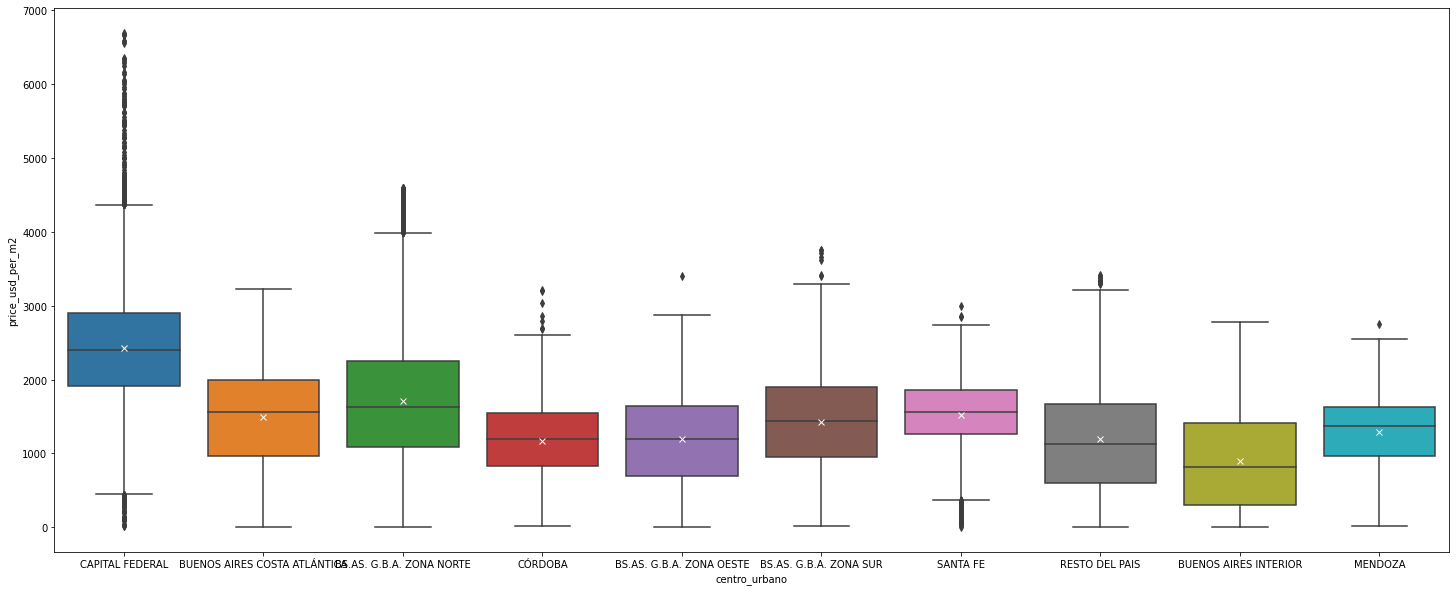

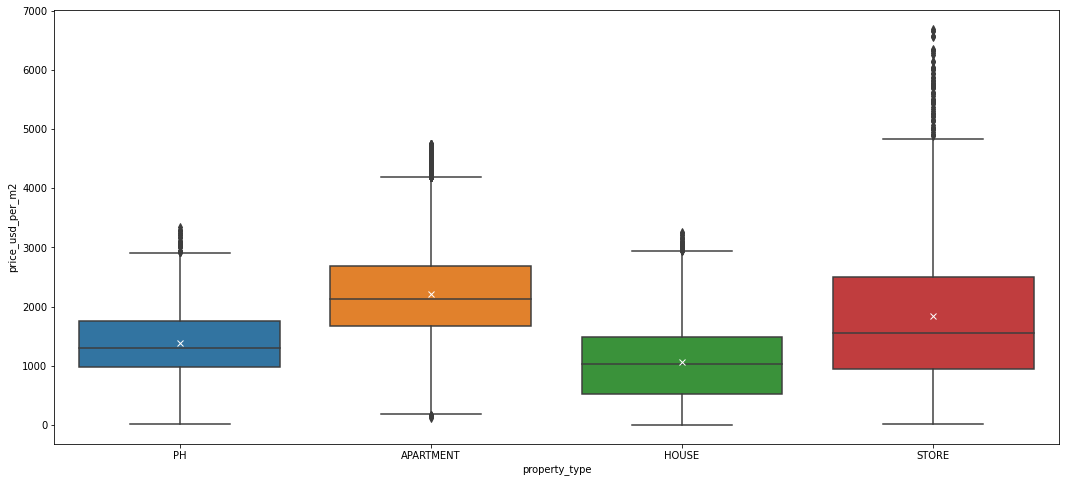

In [33]:
#Analizamos la distribución de las variables categoricas para verificar cuales podrían aportar mayor información al modelo:
plt.figure(figsize=(25,10))
sns.boxplot(x = 'centro_urbano', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'})

plt.figure(figsize=(18,8))
sns.boxplot(x = 'property_type', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'})

In [34]:
#cuanto mayor es la diferencia en el promedio entre las variables, mas va a aportar al modelo

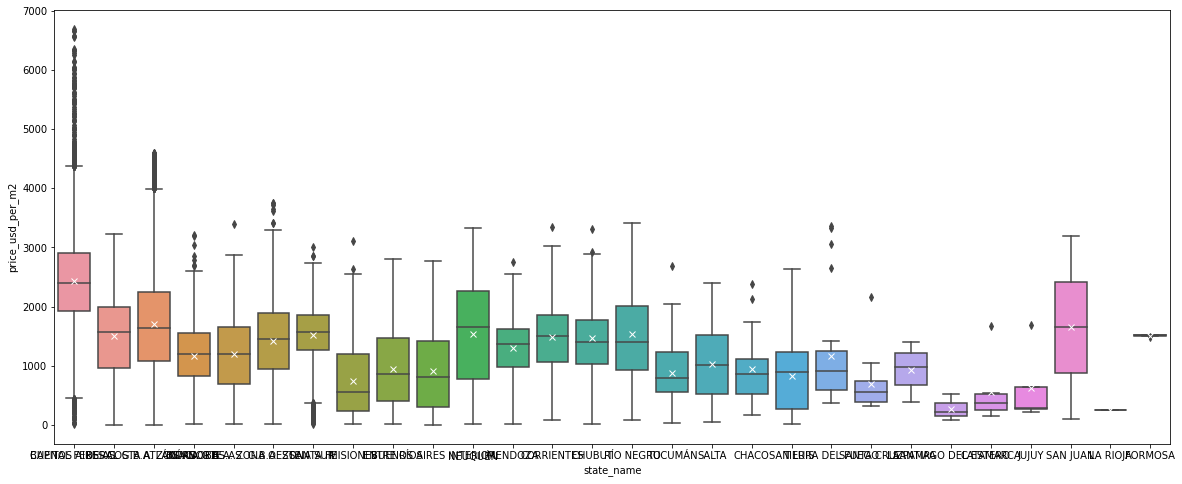

In [72]:
plt.figure(figsize=(20,8))
sns.boxplot(x = 'state_name', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'});

In [36]:
#Transformamos la variable centro_urbano en variable dummies:
centrourbano_dummies = pd.get_dummies(data.centro_urbano, drop_first = True, prefix='dummy')
centrourbano_dummies.head(2)

,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,dummy_MENDOZA,dummy_RESTO DEL PAIS,dummy_SANTA FE
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0


In [37]:
data = pd.concat([data, centrourbano_dummies], axis=1, sort=False)
data.head(2)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,dummy_MENDOZA,dummy_RESTO DEL PAIS,dummy_SANTA FE
0,PH,MATADEROS,CAPITAL FEDERAL,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,APARTMENT,MATADEROS,CAPITAL FEDERAL,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [38]:
#Transformamos la variable property_type en variable dummies:
property_type_dummies = pd.get_dummies(data.property_type, drop_first = True, prefix='dummy')
property_type_dummies.head(2)

,dummy_HOUSE,dummy_PH,dummy_STORE
0,0,1,0
1,0,0,0


In [39]:
data = pd.concat([data, property_type_dummies], axis=1, sort=False)
data.head(2)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,dummy_MENDOZA,dummy_RESTO DEL PAIS,dummy_SANTA FE,dummy_HOUSE,dummy_PH,dummy_STORE
0,PH,MATADEROS,CAPITAL FEDERAL,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,APARTMENT,MATADEROS,CAPITAL FEDERAL,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
#Transformamos la variable state_name en variable dummies:
state_name_dummies = pd.get_dummies(data.state_name, drop_first = True, prefix='state_dummy_')
state_name_dummies.head(2)

,state_dummy__BS.AS. G.B.A. ZONA OESTE,state_dummy__BS.AS. G.B.A. ZONA SUR,state_dummy__BUENOS AIRES COSTA ATLÁNTICA,state_dummy__BUENOS AIRES INTERIOR,state_dummy__CAPITAL FEDERAL,state_dummy__CATAMARCA,state_dummy__CHACO,state_dummy__CHUBUT,state_dummy__CORRIENTES,state_dummy__CÓRDOBA,state_dummy__ENTRE RÍOS,state_dummy__FORMOSA,state_dummy__JUJUY,state_dummy__LA PAMPA,state_dummy__LA RIOJA,state_dummy__MENDOZA,state_dummy__MISIONES,state_dummy__NEUQUÉN,state_dummy__RÍO NEGRO,state_dummy__SALTA,state_dummy__SAN JUAN,state_dummy__SAN LUIS,state_dummy__SANTA CRUZ,state_dummy__SANTA FE,state_dummy__SANTIAGO DEL ESTERO,state_dummy__TIERRA DEL FUEGO,state_dummy__TUCUMÁN
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
data = pd.concat([data, state_name_dummies], axis=1, sort=False)
data.head(2)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,...,state_dummy__BUENOS AIRES COSTA ATLÁNTICA,state_dummy__BUENOS AIRES INTERIOR,state_dummy__CAPITAL FEDERAL,state_dummy__CATAMARCA,state_dummy__CHACO,state_dummy__CHUBUT,state_dummy__CORRIENTES,state_dummy__CÓRDOBA,state_dummy__ENTRE RÍOS,state_dummy__FORMOSA,state_dummy__JUJUY,state_dummy__LA PAMPA,state_dummy__LA RIOJA,state_dummy__MENDOZA,state_dummy__MISIONES,state_dummy__NEUQUÉN,state_dummy__RÍO NEGRO,state_dummy__SALTA,state_dummy__SAN JUAN,state_dummy__SAN LUIS,state_dummy__SANTA CRUZ,state_dummy__SANTA FE,state_dummy__SANTIAGO DEL ESTERO,state_dummy__TIERRA DEL FUEGO,state_dummy__TUCUMÁN
0,PH,MATADEROS,CAPITAL FEDERAL,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,APARTMENT,MATADEROS,CAPITAL FEDERAL,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
#Importamos bibliotecas:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [66]:
#Armamos una función para probar diferentes combinaciones de variables:
def train_test(feature_cols):
    X = data[feature_cols]
    y = data.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred_test = lm.predict(X_test)
    y_pred_train = lm.predict(X_train)
    
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)
    cross_ = cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=3)
    print('La media del error absoluto es', mae.round(2))
    print('La raíz del error cuadrático medio', rmse.round(2))
        
    print('El R2 de entrenamiento del modelo es', r2_score(y_train, y_pred_train).round(2))
    print('El R2 de testeo del modelo es', r2_score(y_test, y_pred_test).round(2))
    print('La validación cruzada:', cross_, 'y su promedio:', cross_.mean().round(2))
    return

In [67]:
#Modelo con 1 variable numerica:
feature_cols = ['surface_total_in_m2']
modelo_1 = train_test(feature_cols)
modelo_1

La media del error absoluto es 710.18
La raíz del error cuadrático medio 911.48
El R2 de entrenamiento del modelo es 0.03
El R2 de testeo del modelo es 0.01
La validación cruzada: [0.0256455  0.0271678  0.03706463] y su promedio: 0.03


In [68]:
#Modelo con 1 variable numerica y dummies de centro urbano:
feature_cols = ['surface_total_in_m2', 'dummy_BS.AS. G.B.A. ZONA OESTE', 'dummy_BS.AS. G.B.A. ZONA SUR',
       'dummy_BUENOS AIRES COSTA ATLÁNTICA', 'dummy_BUENOS AIRES INTERIOR',
       'dummy_CAPITAL FEDERAL', 'dummy_CÓRDOBA', 'dummy_MENDOZA',
       'dummy_RESTO DEL PAIS', 'dummy_SANTA FE']
modelo_2 = train_test(feature_cols)
modelo_2

La media del error absoluto es 597.46
La raíz del error cuadrático medio 775.32
El R2 de entrenamiento del modelo es 0.3
El R2 de testeo del modelo es 0.28
La validación cruzada: [0.29083679 0.29280012 0.30254322] y su promedio: 0.3


In [69]:
#Le agregamos property_type:
feature_cols = ['surface_total_in_m2', 'dummy_BS.AS. G.B.A. ZONA OESTE', 'dummy_BS.AS. G.B.A. ZONA SUR',
       'dummy_BUENOS AIRES COSTA ATLÁNTICA', 'dummy_BUENOS AIRES INTERIOR',
       'dummy_CAPITAL FEDERAL', 'dummy_CÓRDOBA', 'dummy_MENDOZA',
       'dummy_RESTO DEL PAIS', 'dummy_SANTA FE', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE']
modelo_3 = train_test(feature_cols)
modelo_3

La media del error absoluto es 505.63
La raíz del error cuadrático medio 655.95
El R2 de entrenamiento del modelo es 0.49
El R2 de testeo del modelo es 0.48
La validación cruzada: [0.49129092 0.49194706 0.49644322] y su promedio: 0.49


In [70]:
feature_cols = ['surface_total_in_m2', 'dummy_BS.AS. G.B.A. ZONA OESTE', 'dummy_BS.AS. G.B.A. ZONA SUR',
       'dummy_BUENOS AIRES COSTA ATLÁNTICA', 'dummy_BUENOS AIRES INTERIOR',
       'dummy_CAPITAL FEDERAL', 'dummy_CÓRDOBA', 'dummy_MENDOZA',
       'dummy_RESTO DEL PAIS', 'dummy_SANTA FE', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN']
modelo_4 = train_test(feature_cols)
modelo_4

La media del error absoluto es 503.26
La raíz del error cuadrático medio 653.6
El R2 de entrenamiento del modelo es 0.5
El R2 de testeo del modelo es 0.49
La validación cruzada: [0.494354   0.49565696 0.49993514] y su promedio: 0.5


In [456]:
#El Modelo con variable state_name explica levemente mejor que con variable centro_urbano:
feature_cols = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN']
modelo_5 = train_test(feature_cols)
modelo_5

La media del error absoluto es 496.59
La raíz del error cuadrático medio 654.81
El R2 de entrenamiento del modelo es 0.49
El R2 de testeo del modelo es 0.47
La validación cruzada: [0.50245221 0.48455805 0.48495492] y su promedio: 0.49
